    Objectummer                      Locatienaam             Lat/Long Breedte  \
0  CMSA-GAKH-01            Kalverstraat t.h.v. 1  52.372634, 4.892071       8   
1  CMSA-GAWW-11                     Korte Niezel  52.374616, 4.899830     3,8   
2  CMSA-GAWW-12                  Oudekennissteeg  52.373860, 4.898690       3   
3  CMSA-GAWW-13                       Stoofsteeg  52.372439, 4.897689     2,6   
4  CMSA-GAWW-14  Oudezijds Voorburgwal t.h.v. 91  52.373538, 4.898166       4   

  Effectieve  breedte  
0                 6,7  
1                 3,4  
2                 2,6  
3                 2,2  
4                 3,6  


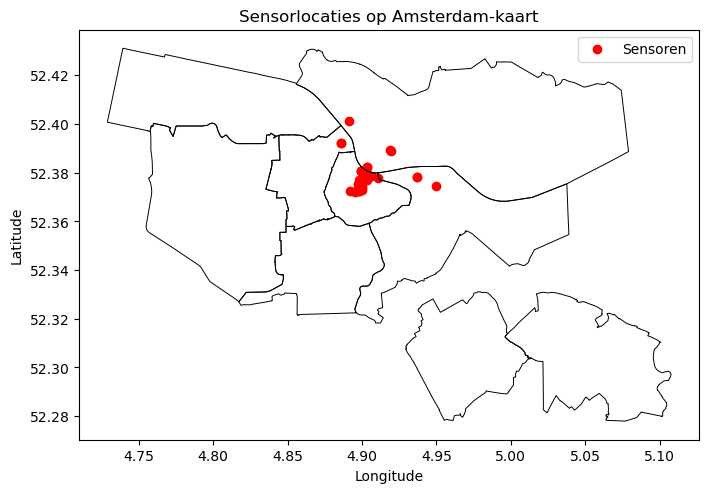

In [1]:
GEOJSON_URL = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_STADSDEEL&THEMA=gebiedsindeling"

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


df = pd.read_csv("sensor-location.xlsx - Sheet1.csv")
print(df.head())

#Split the coordinates
df[["Lat", "Long"]] = df["Lat/Long"].str.split(",", expand=True)

#Convert to numeric
df["Lat"] = pd.to_numeric(df["Lat"], errors="coerce")
df["Long"] = pd.to_numeric(df["Long"], errors="coerce")

# # Plot
# plt.figure(figsize=(6,6))
# plt.scatter(df["Long"], df["Lat"], c="red", marker="o")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Sensor locaties")
# plt.grid(True)
# plt.show()

stadsdelen = gpd.read_file(GEOJSON_URL)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
stadsdelen.boundary.plot(ax=ax, color="black", linewidth=0.7)   # de kaart
ax.scatter(df["Long"], df["Lat"], c="red", marker="o", label="Sensoren")  # sensoren
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Sensorlocaties op Amsterdam-kaart")
ax.legend()
plt.show()

